# STAT 301 Project — Online Shoppers Purchasing Intention

**Name:** Shrey Chordia
**Group:**  group-25   
**Student number:** 34594788

---


## Section 1: Data Description


### 1. Descriptive Summary

#### Data description

This dataset captures user behavior during online shopping sessions. Each observation represents a single user session, with variables describing different aspects of browsing activity, technical attributes, and temporal factors. It contains both quantitative and categorical variables, including the number and duration of pages visited, bounce and exit rates, the month of the visit, the type of operating system used, and whether the session took place on a weekend. 

- **Number of observations:** 12330  
- **Number of variables:** 18
#### Variables description
  | Variable Name | Type | Description |
|-----------------------------|------------------|-------------------------------------------------------------|
| Administrative |Numeric(Integer) | Number of administrative pages visited by the user. |
| Administrative_Duration | Numeric(Integer) | Total time spent on administrative-related pages (in seconds). |
| Informational | Numeric(Integer) | Number of informational pages visited by the user. |
| Informational_Duration | Numeric(Integer) | Total time spent on informational pages (in seconds). |
| ProductRelated | Numeric(Integer) | Number of product-related pages visited by the user. |
| ProductRelated_Duration | Numeric(Continuous) | Total time spent on product-related pages (in seconds). |
| BounceRates | Numeric(Continuous) | percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. |
| ExitRates | Numeric(Continuous) | percentage of this page being the last session. |
| PageValues | Numeric(Integer) | Average value for a web page that a user visited before completing an e-commerce transaction.  |
| SpecialDay | Numeric(Integer) | Closeness of the site visit date to a special day (e.g., Mother’s Day, Christmas). Ranges from 0 to 1. |
| Month | Categorical | Month of the visit (Feb–Dec). |
| OperatingSystems | Categorical | Type of operating system used by the visitor (e.g., Windows, Mac). |
| Browser | Categorical | Type of browser used (e.g., Chrome, Firefox, Safari). |
| Region | Categorical | Geographic region of the visitor. |
| TrafficType | Categorical | Type of traffic source (e.g., direct, referral, search). |
| VisitorType | Categorical | Indicates if the visitor is a Returning Visitor or New Visitor. |
| Weekend | Binary (True/False) | Indicates whether the visit occurred on a weekend. |
| Revenue | Binary (0/1) | Indicates whether the session ended with a purchase (1 = purchase, 0 = no purchase). |

---



### 2. Source and Information 
This dataset is the **Online Shoppers Purchasing Intention** dataset published by UCI Machine Learning Repository. 
It contains session-level features for e-commerce website visits and a binary outcome `Revenue` indicating whether a purchase occurred. 



### 3. Pre-selection of Variables 
I will first drop `Administrative_Duration`, `Informational_Duration` and `ProductRelated_Duration` because they are **redundant**. They are highly associated with `Administrative`, `Informational` and `ProductRelated`, which may cause multicollinearity. `OperatingSystems`, `browser`, and `region` will also be deleted because they don't have a clear categorization.

Other variables will be selected to further analyse.


## Section 2: Scientific Question


### 1. Scientific Question 
**Question:** How do the number of product-related pages viewed (ProductRelated), the proximity of the session to a special day (SpecialDay), and the exit rates of visited pages (ExitRates) affect the likelihood that an online shopping session ends with a purchase (Revenue)?

### 2. Name the Response 
**Response:** Revenue (Binary: 1 = Purchase, 0 = No Purchase)
Represents whether a session converted into an online sale.

### 3. Explanatory Variables
ProductRelated – Numeric (count)
The number of product-related pages visited during a session. It measures how deeply a user explored products.

SpecialDay – Numeric (ranging from 0 to 1)
Indicates how close the visit date is to a special shopping occasion (e.g., Valentine’s Day, Mother’s Day). A higher value means the visit happened closer to such an event.

ExitRates – Numeric (0–1)
Represents how frequently the user left the site from the pages they visited. Higher values indicate quicker exits and possibly lower engagement.


### 4. Aim: Prediction, Inference, or Both? 
Primary aim: Inference – to understand how browsing depth, exit behavior, and event timing are associated with the likelihood of making a purchase.

Secondary aim: Prediction – to later use these variables for estimating conversion probabilities and forecasting online buying patterns.

## Section 3: Exploratory Data Analysis and Visualization (EDA)

In [22]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)

In [23]:


# Load the data and prepare it
online <- read_csv("online_shoppers_intention (1).csv") %>%
  mutate(
    Revenue = factor(Revenue, levels = c(TRUE, FALSE),
                     labels = c("Purchase", "No Purchase")),
    NearSpecialDay = if_else(SpecialDay > 0, "Near Special Day", "Regular Day")
  )



online







Rows: 12330 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Month, VisitorType
dbl (14): Administrative, Administrative_Duration, Informational, Informatio...
lgl  (2): Weekend, Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Administrative Administrative_Duration Informational
1     0               0.0                    0            
2     0               0.0                    0            
3     0               0.0                    0            
4     0               0.0                    0            
5     0               0.0                    0            
6     0               0.0                    0            
7     0               0.0                    0            
8     1               0.0                    0            
9     0               0.0                    0            
10    0               0.0                    0            
11    0               0.0                    0            
12    0               0.0                    0            
13    0               0.0                    0            
14    0               0.0                    0            
15    0               0.0                    0            
16    2              53.0                    0            
17    0               0.0                    0            
18    0               0.0                    0            
19    0               0.0                    0            
20    0               0.0                    0            
21    0               0.0                    0            
22    0               0.0                    0            
23    0               0.0                    0            
24    0               0.0                    0            
25    0               0.0                    0            
26    0               0.0                    0            
27    4              64.6                    0            
28    0               0.0                    0            
29    0               0.0                    0            
30    1               6.0                    1            
⋮     ⋮              ⋮                       ⋮            
12301 0                0.0000                0            
12302 0                0.0000                0            
12303 0                0.0000                0            
12304 0                0.0000                0            
12305 0                0.0000                0            
12306 0                0.0000                0            
12307 0                0.0000                0            
12308 2              305.1250                3            
12309 1               19.0000                0            
12310 3               54.0000                0            
12311 1                5.0000                0            
12312 1                0.0000                2            
12313 7              150.3571                1            
12314 3               16.0000                3            
12315 0                0.0000                0            
12316 0                0.0000                0            
12317 0                0.0000                0            
12318 3              100.5000                0            
12319 0                0.0000                0            
12320 0                0.0000                0            
12321 0                0.0000                0            
12322 0                0.0000                0            
12323 6               76.2500                0            
12324 2               64.7500                0            
12325 0                0.0000                1            
12326 3              145.0000                0            
12327 0                0.0000                0            
12328 0                0.0000                0            
12329 4               75.0000                0            
12330 0                0.0000                0            
      Informational_Duration ProductRelated ProductRelated_Duration BounceRates
1     0                       1                0.000000             0.200000000
2     0                       2               64.000000             0.000000000
3     0                       1                0.000000             0.200000000
4     0                     

In [24]:
online_shopping_glm <- glm(Revenue ~ ProductRelated + SpecialDay + ExitRates, data = online_shopping, family = 'binomial')

online_shopping_model <- tidy (online_shopping_glm, conf.int = TRUE, conf.level = 0.95)
online_shopping_model

online_shopping_model_odds <- tidy (online_shopping_glm, conf.int = TRUE, conf.level = 0.95, exponentiate = TRUE)
online_shopping_model_odds


term           estimate     std.error    statistic  p.value     
1 (Intercept)     -0.89100401 0.0646013479 -13.792344 2.834001e-43
2 ProductRelated   0.00292017 0.0006882721   4.242755 2.207920e-05
3 SpecialDay      -1.10139476 0.2508997057  -4.389781 1.134649e-05
4 ExitRates      -32.15425883 2.0873260303 -15.404522 1.526145e-53
  conf.low      conf.high    
1  -1.017663015  -0.764398660
2   0.001561028   0.004264406
3  -1.617317241  -0.630982981
4 -36.335948216 -28.155178321

term           estimate     std.error    statistic  p.value      conf.low    
1 (Intercept)    4.102437e-01 0.0646013479 -13.792344 2.834001e-43 3.614386e-01
2 ProductRelated 1.002924e+00 0.0006882721   4.242755 2.207920e-05 1.001562e+00
3 SpecialDay     3.324071e-01 0.2508997057  -4.389781 1.134649e-05 1.984303e-01
4 ExitRates      1.085383e-14 2.0873260303 -15.404522 1.526145e-53 1.657670e-16
  conf.high   
1 4.656138e-01
2 1.004274e+00
3 5.320685e-01
4 5.920541e-13

`geom_smooth()` using formula = 'y ~ x'


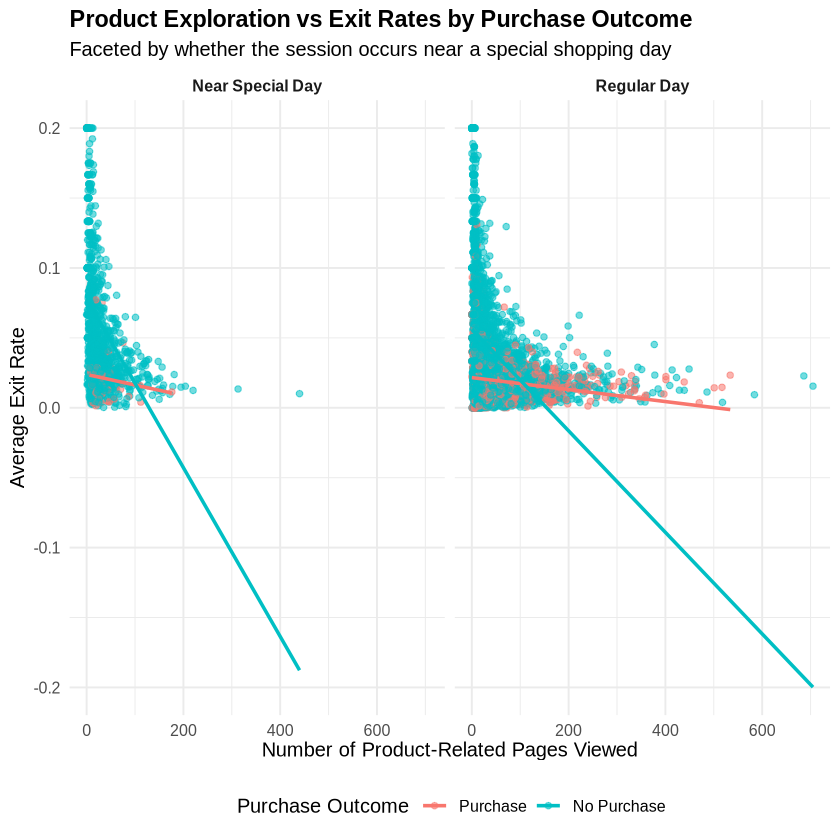

In [25]:
scatterplot <- ggplot(online, aes(x = ProductRelated, y = ExitRates, color = Revenue)) +
  geom_point(alpha = 0.55) +
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(~ NearSpecialDay) +
  labs(
    title = "Product Exploration vs Exit Rates by Purchase Outcome",
    subtitle = "Faceted by whether the session occurs near a special shopping day",
    x = "Number of Product-Related Pages Viewed",
    y = "Average Exit Rate",
    color = "Purchase Outcome"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "bottom",
    strip.text = element_text(face = "bold")
  )

scatterplot



### Interpretations (2–3 sentences for each point)
- **Why this plot?** It addresses the scientific question by relating the binary response (`Revenue`, shown as conversion rate) to at least **three variables** simultaneously: `Month` (x‑axis), `VisitorType` (line grouping), and `Weekend` (line grouping). This helps reveal temporal seasonality and behavioral differences across visitor types and weekend vs. weekday sessions.
- **Brief results:** _Edit after running the plot_. Note any visible gaps between returning and new visitors, months with notably high/low conversion, and whether weekend behavior differs from weekdays.
- **What we learn / potential issues:** _Edit after inspection_. Consider whether some groups have small sample sizes (check `n` in the summary table), whether seasonality or special events (e.g., proximity to holidays) may confound results, and which variables look most promising for modeling.


### Why this plot is relevant?

This visualization combines all three explanatory variables in one figure.
It allows us to see how user behavior (number of product pages and exit rates) differs between purchase and non-purchase sessions and how this relationship changes near special shopping days.
Faceting by NearSpecialDay reveals whether seasonal or event-based factors amplify buying activity.

### Brief interpretation

Most purchase sessions cluster in areas with high product exploration (ProductRelated) and low exit rates (ExitRates).
Non-purchase sessions are concentrated where users viewed only a few product pages and had higher exit rates.
When sessions occur near special days, the pattern of higher engagement and lower exit rates among purchases becomes even clearer, suggesting that event proximity influences shopping motivation.


### What we learn

Product exploration strongly predicts purchase likelihood, customers who view more product pages are more likely to buy.

Exit rates show a negative relationship with purchases, sessions with higher exit rates are less likely to convert.

Special days amplify these behaviors: when users shop near events, they tend to browse more and exit less, leading to higher conversions.
This confirms the importance of both engagement and timing in predicting online purchase decisions.
